# Data Exploration with Linear Data Modeling

## We will be ending with a Multiple Regression in this illustration
Let us load some essential libraries which contain the basic python operations

Import the libraries

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=13)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Set a white background style for seaborn plots, and any grid lines, for now, be white.
Let us make any plots and graphs we make show up right below the cell (inline)

In [2]:
%matplotlib inline

### Load project dataset (in the comma separated value file) into Pandas

Pandas is a software library written for Python for data manipulation and analysis. In particular, it offers data structures and operations for manipulating data tables

In [3]:
df_projects = pd.read_csv("proj_mgmt_data.csv")

For some aesthetic reason, you think some variable titles being capitalized and others not bothers you... :-) Let us rename some offending column titles...

In [4]:
df_projects.rename(columns={'REGION': 'Region','PROJID':'Project_Id','ProjCat':'Proj_Cat','SCHEDEV_Days':'Schedule_Overrun','SCOPCHNG':'Scope_Change','AVGTMSIZ':'Team_Size'}, inplace=True)

In [5]:
df_projects.rename(columns={'CUSTHRS': 'Customer_Hours','PRODTVTY':'Productivity','TIMTOMKT':'Time_to_Market','MiniViable':'Minimum_Viable_Product','Customer_onpremise':'Customer_on_Premise'}, inplace=True)

In [6]:
df_projects.shape

(384, 16)

In [7]:
df_projects.describe()

,Project_Id,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,193.666667,9.357187,570.544271,36.861979,6.929687,4099.231771,353.424479,24.552083,34.885000,4.320182,1.158854,1.505208,1.174479,1.473958
std,111.793512,33.888322,620.939327,101.676183,4.656331,4824.430799,585.568929,54.426201,30.675352,2.582395,0.793758,0.666211,0.803566,0.677385
min,1.000000,-61.450000,3.000000,-82.000000,1.000000,181.000000,0.000000,0.000000,0.040000,0.370000,0.000000,0.000000,0.000000,0.000000
25%,96.750000,0.000000,207.750000,-7.000000,4.775000,1616.750000,8.750000,0.000000,16.230000,2.622500,1.000000,1.000000,0.750000,1.000000
50%,193.500000,0.000000,381.500000,7.500000,6.000000,2866.500000,136.000000,5.000000,27.365000,3.900000,1.000000,2.000000,1.000000,2.000000
75%,290.250000,7.955000,729.250000,53.000000,8.000000,4868.750000,469.000000,21.000000,46.455000,5.300000,2.000000,2.000000,2.000000,2.000000
max,386.000000,398.320000,4571.000000,1220.000000,45.000000,47892.000000,4800.000000,415.000000,332.310000,21.030000,2.000000,2.000000,2.000000,2.000000


In [8]:
df_projects.tail()

,Region,Project_Id,Proj_Cat,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise
379,North America,382,Dev,11.48,741,-9,7.0,2213,178,24,58.39,2.27,1,1,2,2
380,North America,383,Dev,-9.09,68,4,4.0,2346,700,2,5.55,4.67,1,1,0,2
381,North America,384,Dev,-49.18,722,0,7.5,819,3,1,139.78,1.03,2,2,2,0
382,North America,385,Dev,34.43,590,0,4.1,1434,120,0,73.87,2.73,1,2,2,2
383,North America,386,Dev,-11.48,841,0,7.5,1700,320,0,91.51,1.80,2,2,2,1


In [9]:
df_projects.cov()

,Project_Id,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise
Project_Id,12497.789382,-314.152559,-6.968186e+03,821.008703,-13.088773,-4.401349e+04,-7.438072e+03,-468.841601,-195.278695,-3.736623,-11.845083,-1.909487,-8.234117,-3.149695
Schedule_Overrun,-314.152559,1148.418349,2.827847e+03,343.615668,6.076000,3.767588e+04,5.285439e+03,218.738711,-104.616062,32.352307,-0.397098,-0.244189,0.820753,0.091102
NormProjSize,-6968.186249,2827.847305,3.855656e+05,25562.325970,1147.540980,1.594293e+06,1.534627e+05,12726.547297,8325.784060,734.697786,56.205743,16.189064,104.327765,60.809250
Scope_Change,821.008703,343.615668,2.556233e+04,10338.046175,41.720557,8.007549e+04,6.083701e+03,1065.115562,943.698890,54.658746,-5.620315,2.312731,5.199079,4.065587
Team_Size,-13.088773,6.076000,1.147541e+03,41.720557,21.681414,1.748368e+04,9.525560e+02,104.852758,-25.272253,4.505624,-0.257992,-0.207727,0.177835,0.271271
Developer_Hours,-44013.486510,37675.883500,1.594293e+06,80075.494214,17483.684224,2.327513e+07,1.470689e+06,109368.028367,-32979.021893,8173.457608,-378.151796,-414.535153,-1.904775,372.795869
Customer_Hours,-7438.072237,5285.438534,1.534627e+05,6083.701038,952.556034,1.470689e+06,3.428910e+05,4860.258513,-1037.521292,574.716137,20.384091,6.244520,44.599373,101.116827
Post_release_defects,-468.841601,218.738711,1.272655e+04,1065.115562,104.852758,1.093680e+05,4.860259e+03,2962.211379,87.409164,38.894024,1.319381,1.660302,3.832925,1.398227
Productivity,-195.278695,-104.616062,8.325784e+03,943.698890,-25.272253,-3.297902e+04,-1.037521e+03,87.409164,940.977225,-16.053764,3.809987,2.945065,6.818760,-0.110522
Time_to_Market,-3.736623,32.352307,7.346978e+02,54.658746,4.505624,8.173458e+03,5.747161e+02,38.894024,-16.053764,6.668765,-0.183084,-0.320615,-0.123870,0.198268


In [10]:
df_projects.cov()

,Project_Id,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise
Project_Id,12497.789382,-314.152559,-6.968186e+03,821.008703,-13.088773,-4.401349e+04,-7.438072e+03,-468.841601,-195.278695,-3.736623,-11.845083,-1.909487,-8.234117,-3.149695
Schedule_Overrun,-314.152559,1148.418349,2.827847e+03,343.615668,6.076000,3.767588e+04,5.285439e+03,218.738711,-104.616062,32.352307,-0.397098,-0.244189,0.820753,0.091102
NormProjSize,-6968.186249,2827.847305,3.855656e+05,25562.325970,1147.540980,1.594293e+06,1.534627e+05,12726.547297,8325.784060,734.697786,56.205743,16.189064,104.327765,60.809250
Scope_Change,821.008703,343.615668,2.556233e+04,10338.046175,41.720557,8.007549e+04,6.083701e+03,1065.115562,943.698890,54.658746,-5.620315,2.312731,5.199079,4.065587
Team_Size,-13.088773,6.076000,1.147541e+03,41.720557,21.681414,1.748368e+04,9.525560e+02,104.852758,-25.272253,4.505624,-0.257992,-0.207727,0.177835,0.271271
Developer_Hours,-44013.486510,37675.883500,1.594293e+06,80075.494214,17483.684224,2.327513e+07,1.470689e+06,109368.028367,-32979.021893,8173.457608,-378.151796,-414.535153,-1.904775,372.795869
Customer_Hours,-7438.072237,5285.438534,1.534627e+05,6083.701038,952.556034,1.470689e+06,3.428910e+05,4860.258513,-1037.521292,574.716137,20.384091,6.244520,44.599373,101.116827
Post_release_defects,-468.841601,218.738711,1.272655e+04,1065.115562,104.852758,1.093680e+05,4.860259e+03,2962.211379,87.409164,38.894024,1.319381,1.660302,3.832925,1.398227
Productivity,-195.278695,-104.616062,8.325784e+03,943.698890,-25.272253,-3.297902e+04,-1.037521e+03,87.409164,940.977225,-16.053764,3.809987,2.945065,6.818760,-0.110522
Time_to_Market,-3.736623,32.352307,7.346978e+02,54.658746,4.505624,8.173458e+03,5.747161e+02,38.894024,-16.053764,6.668765,-0.183084,-0.320615,-0.123870,0.198268


Again, just like we saw the first few rows of the dataframe using the head() function, you can see the last few rows using the tail() function.. just to make sure Pandas figured out your start AND THE end of the dataframe correctly...

Just like creating Tabulations using Excel, you might want to tabulate some data elements by groups that you observe. For example, the "Region" field and "Project Category" might be some you might want to examine further...

### Tabulations by Group
The groupby function (used below) of the Data Frame 'counts' the number of 'Project ID's associated with each Region.

In [12]:
Region_df = df_projects.groupby('Region')["Project_Id"].agg(["count"]).reset_index() 
Region_df

,Region,count
0,Europe,77
1,North America,307


Let us group the data by "Project Category"
The groupby function of a dataFrame is used below to count the number of 'Project ID's associated with each Project Category.

In [13]:
Category_df = df_projects.groupby('Proj_Cat')["Project_Id"].agg(["count"]).reset_index() 
Category_df

,Proj_Cat,count
0,Dev,219
1,Mod,165


You might want to get some other statistics and variable groupings

In [18]:
Time_df = df_projects.groupby('Proj_Cat')["Time_to_Market"].agg(["median"]).reset_index() 
Time_df

,Proj_Cat,median
0,Dev,4.13
1,Mod,3.30


In [20]:
Productivity_df = df_projects.groupby('Proj_Cat')["Productivity"].agg(["median"]).reset_index() 
Productivity_df

,Proj_Cat,median
0,Dev,30.63
1,Mod,22.53


In [26]:
Def2_df = df_projects.groupby('Region')["Post_release_defects"].agg(["median"]).reset_index() 
Def2_df

,Region,median
0,Europe,0
1,North America,6


In [21]:
Defects_df = df_projects.groupby('Proj_Cat')["Post_release_defects"].agg(["median"]).reset_index() 
Defects_df

,Proj_Cat,median
0,Dev,6
1,Mod,3


# Pearson Correlations

A quick reference to read about Pearson correlations is here (to get the right intuition):

http://onlinestatbook.com/2/describing_bivariate_data/pearson.html

In brief, 
- 1 pearson correlation => Perfectly negatively correlated variables
+ 1 pearson correlation => Perfectly positively correlated variables
  
  0 correlation => Variables are not correlated

In [23]:
df_projects.corr()

,Project_Id,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise
Project_Id,1.000000,-0.082923,-0.100382,0.072229,-0.025144,-0.081606,-0.113623,-0.077055,-0.056944,-0.012943,-0.133485,-0.025638,-0.091660,-0.041593
Schedule_Overrun,-0.082923,1.000000,0.134387,0.099725,0.038506,0.230445,0.266350,0.118595,-0.100637,0.369686,-0.014762,-0.010816,0.030140,0.003969
NormProjSize,-0.100382,0.134387,1.000000,0.404885,0.396895,0.532198,0.422061,0.376577,0.437106,0.458181,0.114036,0.039135,0.209088,0.144572
Scope_Change,0.072229,0.099725,0.404885,1.000000,0.088123,0.163243,0.102181,0.192473,0.302569,0.208170,-0.069639,0.034142,0.063634,0.059029
Team_Size,-0.025144,0.038506,0.396895,0.088123,1.000000,0.778293,0.349356,0.413740,-0.176934,0.374704,-0.069803,-0.066963,0.047528,0.086005
Developer_Hours,-0.081606,0.230445,0.532198,0.163243,0.778293,1.000000,0.520591,0.416520,-0.222845,0.656050,-0.098749,-0.128974,-0.000491,0.114075
Customer_Hours,-0.113623,0.266350,0.422061,0.102181,0.349356,0.520591,1.000000,0.152501,-0.057760,0.380060,0.043856,0.016007,0.094783,0.254924
Post_release_defects,-0.077055,0.118595,0.376577,0.192473,0.413740,0.416520,0.152501,1.000000,0.052355,0.276727,0.030540,0.045790,0.087640,0.037926
Productivity,-0.056944,-0.100637,0.437106,0.302569,-0.176934,-0.222845,-0.057760,0.052355,1.000000,-0.202658,0.156475,0.144110,0.276627,-0.005319
Time_to_Market,-0.012943,0.369686,0.458181,0.208170,0.374704,0.656050,0.380060,0.276727,-0.202658,1.000000,-0.089318,-0.186358,-0.059693,0.113343


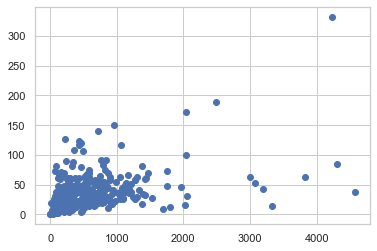

In [20]:
plt.scatter(df_projects['NormProjSize'],df_projects['Productivity'])

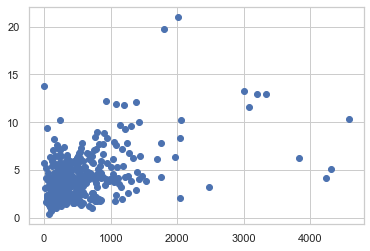

In [21]:
plt.scatter(df_projects['NormProjSize'],df_projects['Time_to_Market'])

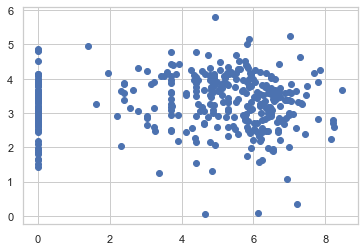

In [22]:
plt.scatter(np.log(1+df_projects['Customer_Hours']),np.log(1+df_projects['Productivity']))

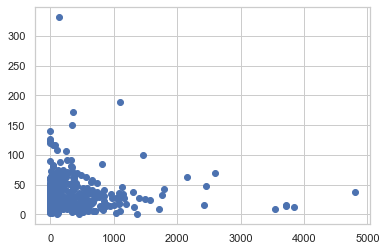

In [24]:
plt.scatter(df_projects['Customer_Hours'],df_projects['Productivity'])

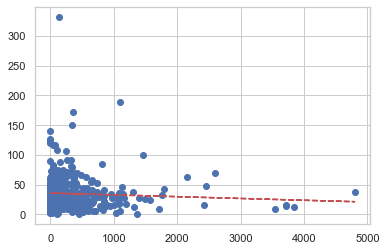

In [28]:
plt.scatter(df_projects['Customer_Hours'],df_projects['Productivity'])

x = df_projects['Customer_Hours']
y = df_projects['Productivity']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

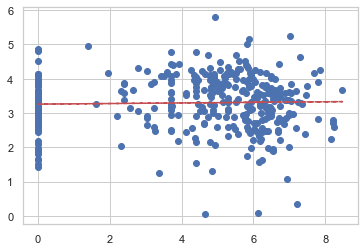

In [29]:
plt.scatter(np.log(1+df_projects['Customer_Hours']),np.log(1+df_projects['Productivity']))
x = np.log(1+df_projects['Customer_Hours'])
y = np.log(1+df_projects['Productivity'])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

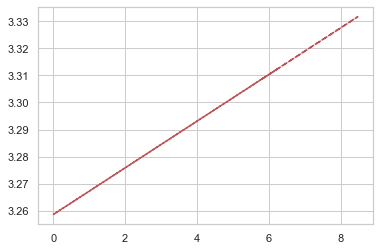

In [36]:
x = np.log(1+df_projects['Customer_Hours'])
y = np.log(1+df_projects['Productivity'])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Of course, you should ignore the Project_Id Column and Row in the Correlation table since it does not have quantitative significance of any kind...

Let us say - a project is defined as successful if it is on-time and the product is relatively defect_free
We use the median value of Schedule_Overrun and the median value of Post_release_defects to define a new variable: "Success"

In [12]:
df_projects.loc[(df_projects.Schedule_Overrun <= 0.00) & (df_projects.Post_release_defects <= 5.0), 'Success'] = 1
df_projects.loc[(df_projects.Schedule_Overrun > 0.00) | (df_projects.Post_release_defects > 5.0), 'Success'] = 0
df_projects['High_customer_engagement'] = np.where(df_projects['Customer_Hours']>=136.0, 1, 0)
df_projects.head(10)

,Region,Project_Id,Proj_Cat,Schedule_Overrun,NormProjSize,Scope_Change,Team_Size,Developer_Hours,Customer_Hours,Post_release_defects,Productivity,Time_to_Market,Minimum_Viable_Product,Saiv,Target_prototyping,Customer_on_Premise,Success,High_customer_engagement
0,North America,1,Dev,2.48,862,6,7.0,3528,512,45,43.89,4.13,0,2,2,2,0.0,1
1,North America,2,Dev,0.00,669,-46,6.0,4259,135,0,24.09,4.03,1,1,1,1,1.0,0
2,North America,3,Dev,-0.72,283,53,4.9,2023,10,7,28.37,4.57,2,2,2,2,0.0,0
3,North America,4,Dev,4.96,803,-10,5.0,3736,611,29,39.00,4.23,2,2,2,2,0.0,1
4,North America,5,Dev,56.20,1340,65,6.0,6000,660,8,40.89,6.30,2,2,1,2,0.0,1
5,North America,6,Dev,29.75,607,-39,5.0,4148,1570,16,24.99,5.23,2,2,1,2,0.0,1
6,North America,7,Mod,4.04,253,-59,6.0,2699,553,3,15.71,3.43,2,2,2,1,0.0,1
7,North America,8,Dev,9.24,527,4,7.0,4681,608,9,22.59,4.33,0,1,1,1,0.0,1
8,North America,9,Dev,2.48,764,60,6.0,5047,350,0,22.94,4.13,2,2,1,2,0.0,1
9,North America,10,Dev,39.52,742,-17,9.0,5208,1400,48,26.83,5.77,2,1,2,1,0.0,1


We will next perform some basic multivariate regressions and logistic regressions and so on... after we identify KEY Independent and Dependent variables

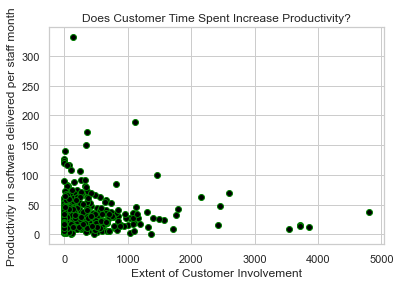

In [13]:
Customer_Hours = df_projects['Customer_Hours']
Productivity = df_projects['Productivity']
plt.scatter(Customer_Hours, Productivity, color = 'black', edgecolors='green')
plt.xlabel('Extent of Customer Involvement')
plt.ylabel('Productivity in software delivered per staff month')
plt.title('Does Customer Time Spent Increase Productivity?')
plt.show()

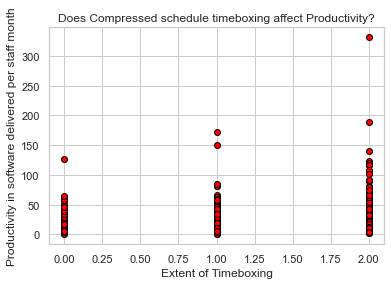

In [14]:
Time_Box = df_projects['Saiv']
Productivity = df_projects['Productivity']
plt.scatter(Time_Box, Productivity, color ='red', edgecolors = 'black')
plt.xlabel('Extent of Timeboxing')
plt.ylabel('Productivity in software delivered per staff month')
plt.title('Does Compressed schedule timeboxing affect Productivity?')
plt.show()

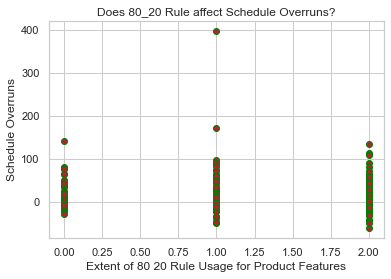

In [42]:
Min_via_product = df_projects['Minimum_Viable_Product']
Schedule_Overrun = df_projects['Schedule_Overrun']
plt.scatter(Min_via_product, Schedule_Overrun, color ='brown', edgecolors = 'green')
plt.xlabel('Extent of 80 20 Rule Usage for Product Features')
plt.ylabel('Schedule Overruns')
plt.title('Does 80_20 Rule affect Schedule Overruns?')
plt.show()

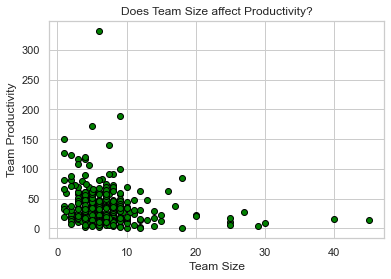

In [43]:
plt.scatter(df_projects['Team_Size'], df_projects['Productivity'], color ='green', edgecolors = 'black')
plt.xlabel('Team Size')
plt.ylabel('Team Productivity')
plt.title('Does Team Size affect Productivity?')
plt.show()

In [27]:
ProductivityChange_df = df_projects.groupby('Proj_Cat')["Productivity"].agg(["mean"]).reset_index() 
ProductivityChange_df

,Proj_Cat,mean
0,Dev,38.632740
1,Mod,29.910727


In [45]:
dev_projs = df_projects[(df_projects['Proj_Cat'] == 'Dev')]
dev_projs.reset_index(inplace= True)

mod_projs = df_projects[(df_projects['Proj_Cat'] == 'Mod')]
mod_projs.reset_index(inplace= True)

## Test for differences across Project Types
A Levene's test can help find if the Productivity measure across the development projects subset and modification projects subset shows similar variance. The null hypothesis being tested is that the variance of the measure is equal in both sub-samples. Full documentation can be found here:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [46]:
from scipy import stats
stats.levene(dev_projs['Productivity'], mod_projs['Productivity'])

LeveneResult(statistic=2.2011098113885588, pvalue=0.13873600274618306)

In [47]:
stats.ttest_ind(dev_projs['Productivity'], mod_projs['Productivity'])

Ttest_indResult(statistic=2.782367823165077, pvalue=0.0056641511626341024)

In [48]:
stats.ttest_ind(dev_projs['Productivity'],mod_projs['Productivity'], equal_var=False)

Ttest_indResult(statistic=2.944119048444805, pvalue=0.0034404083057641963)

# Let us next explore Multiple Regressions and examine if there are other factors that can explain and predict productivity

## Productivity 

### Data Preparation
From the correlation table, let us select distinct measures that seem to affect Productivity

In [32]:
Productivity_DataX = df_projects[['Proj_Cat','NormProjSize','Scope_Change','Target_prototyping','Team_Size']]

In [33]:
Productivity_DataX.head()

,Proj_Cat,NormProjSize,Scope_Change,Target_prototyping,Team_Size
0,Dev,862,6,2,7.0
1,Dev,669,-46,1,6.0
2,Dev,283,53,2,4.9
3,Dev,803,-10,2,5.0
4,Dev,1340,65,1,6.0


Since the Project Category variables (Proj_Cat variable) is categorical, let us create dummy variables using the Pandas .get_dummies() function

In [34]:
Productivity_DataX = pd.get_dummies(Productivity_DataX)
Productivity_DataX.tail()

,NormProjSize,Scope_Change,Target_prototyping,Team_Size,Proj_Cat_Dev,Proj_Cat_Mod
379,741,-9,2,7.0,1,0
380,68,4,0,4.0,1,0
381,722,0,2,7.5,1,0
382,590,0,2,4.1,1,0
383,841,0,2,7.5,1,0


The output variable can be stored in a separate dataset. This split will be useful as we later explore Data set splitting into Training and Testing subsets

In [35]:
Productivity_DataY = df_projects[['Productivity']]

In [36]:
Productivity_DataY.head()

,Productivity
0,43.89
1,24.09
2,28.37
3,39.00
4,40.89


## Time to market

### Data Preparation
Let us repeat the same procedure for the Time to market... To start with let us use some factors that explain time to market

In [57]:
Time_to_Market_DataX = df_projects[['Proj_Cat','Team_Size','Saiv','Customer_on_Premise','Target_prototyping']]
Time_to_Market_DataX = pd.get_dummies(Time_to_Market_DataX)

In [55]:
Time_to_Market_DataX.head()

,Team_Size,Saiv,Customer_on_Premise,Target_prototyping,Proj_Cat_Dev,Proj_Cat_Mod
0,7.0,2,2,2,1,0
1,6.0,1,1,1,1,0
2,4.9,2,2,2,1,0
3,5.0,2,2,2,1,0
4,6.0,2,2,1,1,0


In [29]:
Time_to_Market_DataY = df_projects[['Time_to_Market']]

In [30]:
Time_to_Market_DataY.head()

,Time_to_Market
0,4.13
1,4.03
2,4.57
3,4.23
4,6.30


# Scipy's Stats library and statsmodels libraries
These libraries are for running a linear regression model (ordinary least squares) in our case

In [37]:

import statsmodels.formula.api as smf
from scipy import stats


First pass at a Multiple Regression Model for Developer Productivity

In [39]:

prod_model = smf.ols("Productivity ~ NormProjSize + Team_Size + Scope_Change + Target_prototyping", data= df_projects).fit()

prod_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Productivity   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     57.89
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.18e-38
Time:                        18:17:53   Log-Likelihood:                -1767.4
No. Observations:                 384   AIC:                             3545.
Df Residuals:                     379   BIC:                             3565.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.2435      2.824     10.356      0.000      23.691      34.796
NormProjSize           0.0251      0.002     10.330      0.000       0.020       0.030
Team_Size             -2.6216      0.292     -8.984      0.000      -3.195      -2.048
Scope_Change           0.0363      0.013      2.705      0.007       0.010       0.063
Target_prototyping     6.9320      1.582      4.383      0.000       3.822      10.042
==============================================================================
Omnibus:                      219.540   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2499.096
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                      14.709   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Model 2 Residuals Probability Plot')

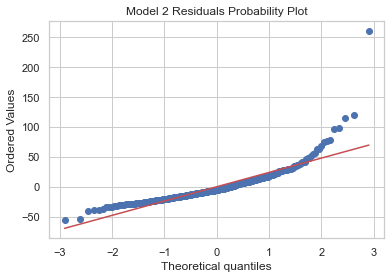

In [51]:
stats.probplot(prod_model.resid, plot= plt)
plt.title("Model 2 Residuals Probability Plot")

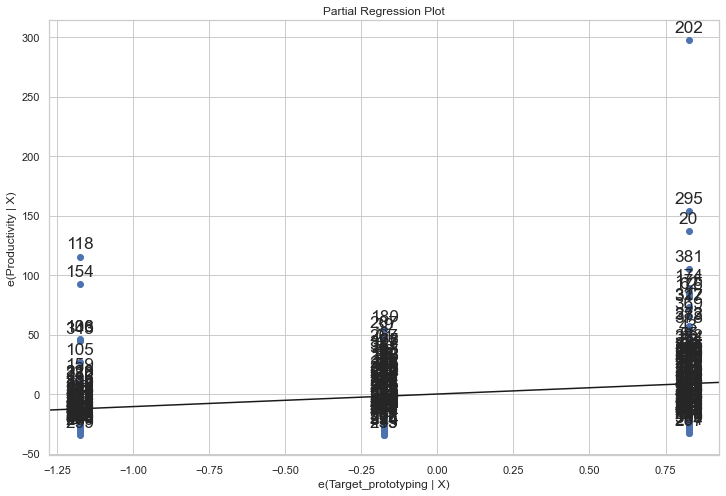

In [52]:
import statsmodels.api as sm
import matplotlib.pyplot as plt2
fig, ax = plt2.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("Productivity", "Target_prototyping",[], data= df_projects, ax=ax)

Lots of statistics and coefficients to examine in the Table above. I would, at a minimum, pay attention to:
the coefficients, Adjusted R-squared, Overall model P-value, Variable Significances... and any diagnostic error that pops up...

Testing whether the linear model residuals (predicted vs. actual) show any red flags...

Multiple regression (OLS here) assumes that the residual values (observed minus predicted values) are normally distributed, and that the regression function (the relationship between the independent and dependent variables) is linear in nature.

### Repeating a similar procedure for modeling Time to market

In [53]:
tmkt_model = smf.ols("Time_to_Market ~ Proj_Cat + Team_Size + Saiv + Customer_on_Premise + Target_prototyping", data= df_projects).fit()
 
tmkt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Time_to_Market   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     19.55
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.49e-17
Time:                        15:40:35   Log-Likelihood:                -864.51
No. Observations:                 384   AIC:                             1741.
Df Residuals:                     378   BIC:                             1765.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8806      0.433      8.958      0.000       3.029       4.732
Proj_Cat[T.Mod]        -0.8584      0.242     -3.547      0.000      -1.334      -0.382
Team_Size               0.1961      0.026      7.642      0.000       0.146       0.247
Saiv                   -0.5728      0.187     -3.071      0.002      -0.940      -0.206
Customer_on_Premise     0.3797      0.177      2.142      0.033       0.031       0.728
Target_prototyping     -0.2110      0.154     -1.370      0.171      -0.514       0.092
==============================================================================
Omnibus:                      150.876   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.366
Skew:                           1.700   Prob(JB):                    7.16e-136
Kurtosis:                       8.228   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Model 1 Residuals Probability Plot')

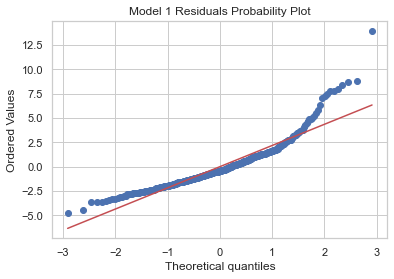

In [36]:
stats.probplot(tmkt_model.resid, plot= plt)
plt.title("Model 1 Residuals Probability Plot")


# Next, we are going to be running a predictive model. 

## Further, we will be using the scikit-learn library - LinearRegression in the process instead of the statsmodel library

https://scikit-learn.org/stable/user_guide.html

## Split the dataset into Training and Testing Subset

First let us split the data set into Training dataset and Testing dataset. You can choose how much percent of the data you want as Training subset and how much you want for Testing, by tweaking the test_size parameter

In [64]:
from sklearn.model_selection import train_test_split  
PX_train, PX_test, Py_train, Py_test = train_test_split(Productivity_DataX, Productivity_DataY, test_size=0.3, random_state=0)  

Procedure is very straightforward like last time...

In [65]:
from sklearn.linear_model import LinearRegression  
Prod_regressor = LinearRegression()  
Prod_regressor.fit(PX_train, Py_train)

LinearRegression()

In [66]:
print(Prod_regressor.intercept_)

[28.12742804]


In [67]:
print(Prod_regressor.coef_)

[[-1.46594447  2.99672755  0.09598338  8.9438607   2.19869534 -2.19869534]]


In [68]:
Py_pred = Prod_regressor.predict(PX_test)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# Print the coefficients
print('Coefficients: \n', Prod_regressor.coef_)
# Report the mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Py_test, Py_pred))
# Explained variance score: 1 => perfect prediction
print('Variance score: %.2f' % r2_score(Py_test, Py_pred))

Coefficients: 
 [[-1.46594447  2.99672755  0.09598338  8.9438607   2.19869534 -2.19869534]]
Mean squared error: 510.79
Variance score: 0.18


Note the ordering of the coefficients...

Better models will have lower "Mean Square Error".

Variance Score is the same as R-Squared - the proportion of variation in the Outcome Variable Explained by the Proportion of Variation in the Independent Variables

## Time to market Model - Linear OLS model - Prediction procedure

In [43]:
TX_train, TX_test, Ty_train, Ty_test = train_test_split(Time_to_Market_DataX, Time_to_Market_DataY, test_size=0.4, random_state=0)  

In [44]:
TimeMkt_regressor = LinearRegression()  
TimeMkt_regressor.fit(TX_train, Ty_train)

LinearRegression()

In [45]:
print(TimeMkt_regressor.intercept_)
print(TimeMkt_regressor.coef_)
Ty_pred = TimeMkt_regressor.predict(TX_test)

[3.4366187]
[[ 0.20200622 -0.67246946  0.48555138 -0.27873236  0.43755429 -0.43755429]]


Go back to the Dataset creation steps to map the corresponding coefficient to the corresponding column

In [46]:
# Print the coefficients
print('Coefficients: \n', TimeMkt_regressor.coef_)
# Report the mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Ty_test, Ty_pred))
# Explained variance score: 1 => perfect prediction
print('Variance score: %.2f' % r2_score(Ty_test, Ty_pred))

Coefficients: 
 [[ 0.20200622 -0.67246946  0.48555138 -0.27873236  0.43755429 -0.43755429]]
Mean squared error: 4.53
Variance score: 0.19
